---
***Feelings Forecast: Emotion Prediction from Your Text***


---




Libraries

In [4]:
# dl packages
# Update the import statements to use TensorFlow's Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# ml packages
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/drive/MyDrive/Projects/EMOTION DETECTION/train.txt'

In [7]:
train_data = pd.read_csv(file_path, header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")

In [8]:
train_data.head()


,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
train_data['length'] = [len(x) for x in train_data['Comment']]

In [10]:
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
19995,i just keep feeling like someone is being unki...,anger,163
19996,im feeling a little cranky negative after this...,anger,66
19997,i feel that i am useful to my people and that ...,joy,85
19998,im feeling more comfortable with derby i feel ...,joy,88


In [11]:
print(f"shape = {train_data.shape}")

shape = (20000, 3)


In [12]:
train_data.isnull().sum()


,0
Comment,0
Emotion,0
length,0


In [13]:
print(f"Number of duplicated rows: {train_data.duplicated().sum()}")


Number of duplicated rows: 1


In [14]:
train_data = train_data.drop_duplicates()

print(f"Shape after removing duplicates: {train_data.shape}")


Shape after removing duplicates: (19999, 3)


EXPLORATORY DATA ANALYSIS

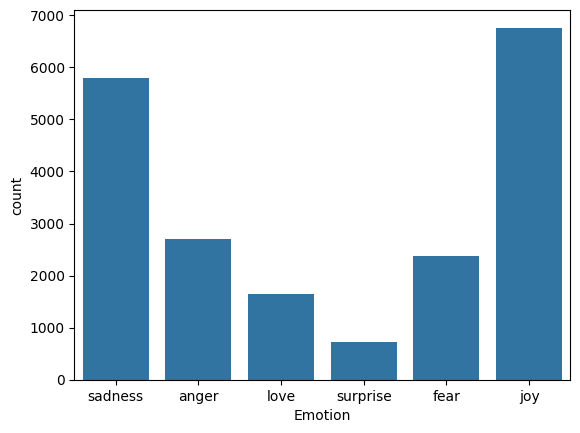

In [15]:
sns.countplot(x = train_data['Emotion'])
plt.show()

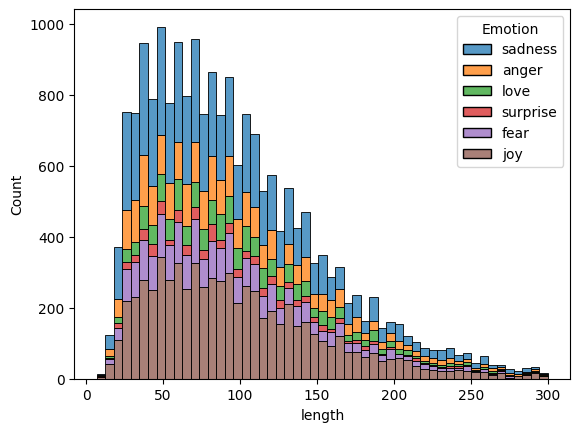

In [16]:
sns.histplot(data=train_data, x='length', hue='Emotion', multiple='stack')

plt.show()

In [17]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud)
    plt.axis("off");

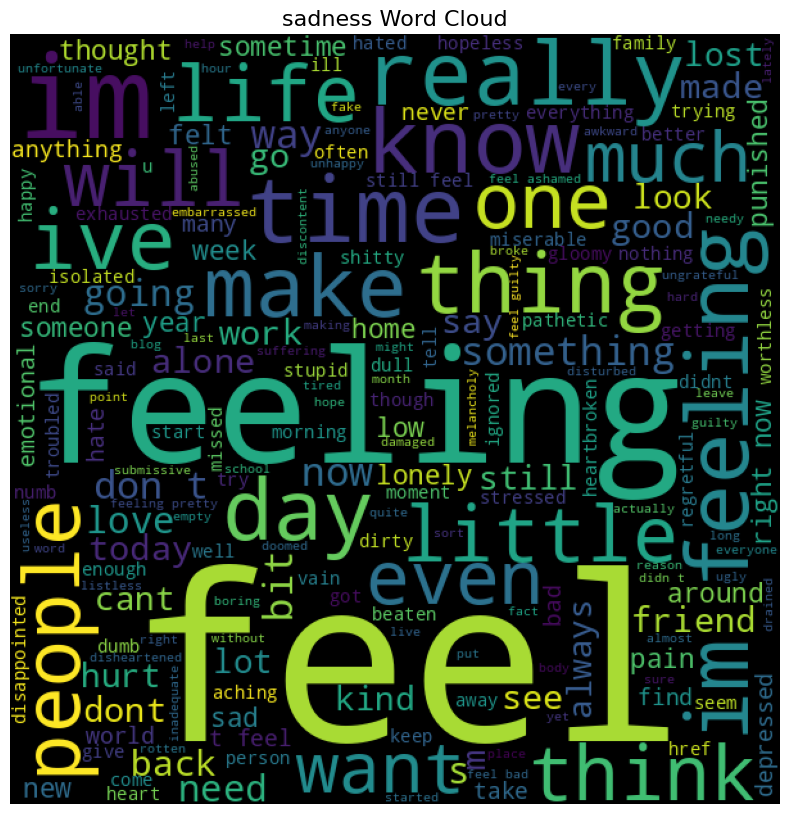

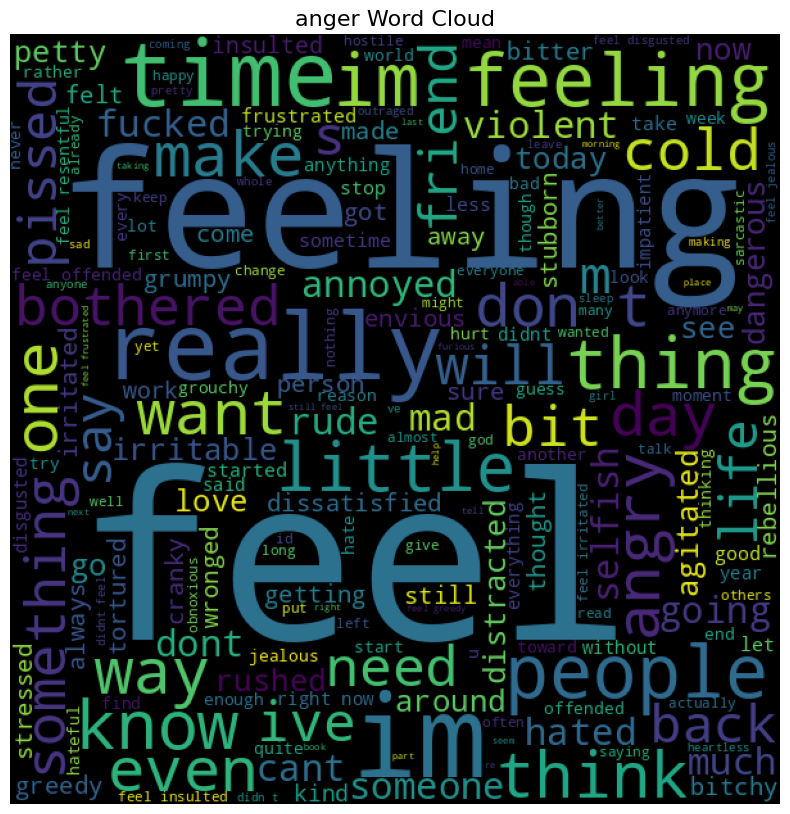

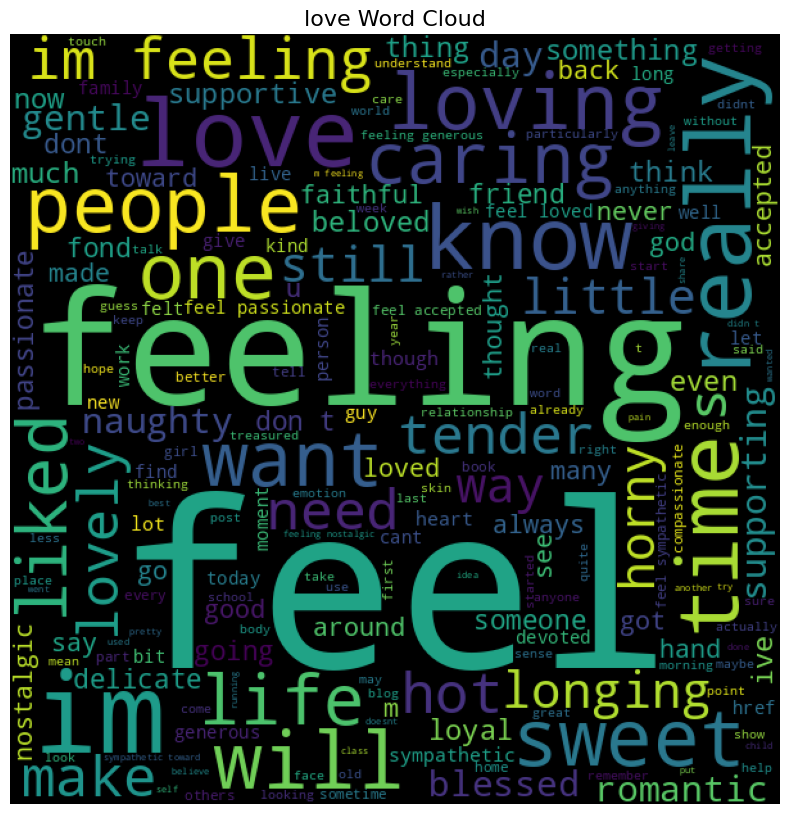

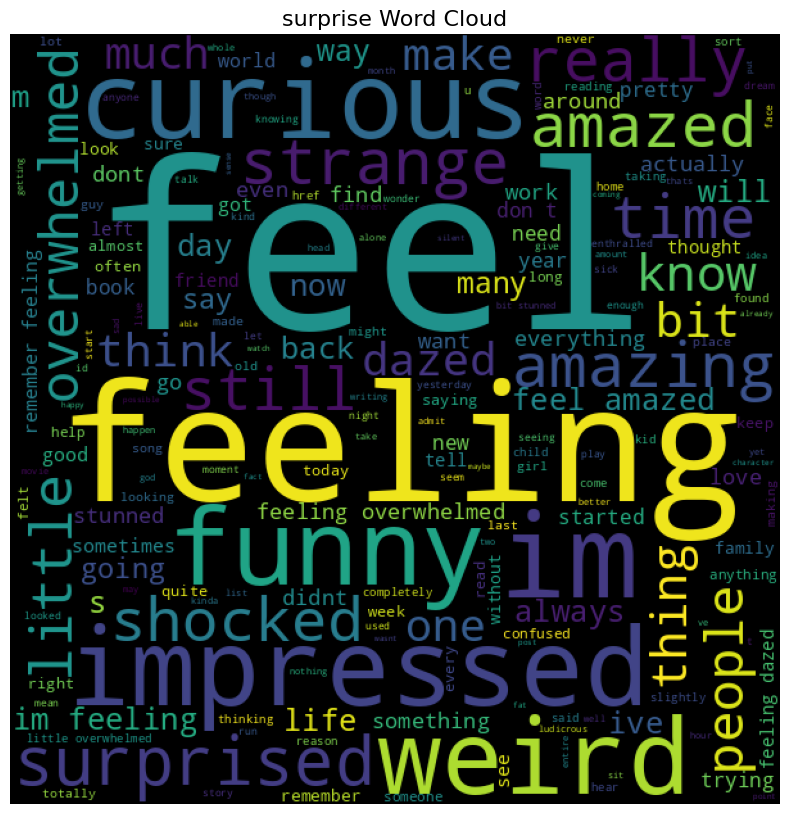

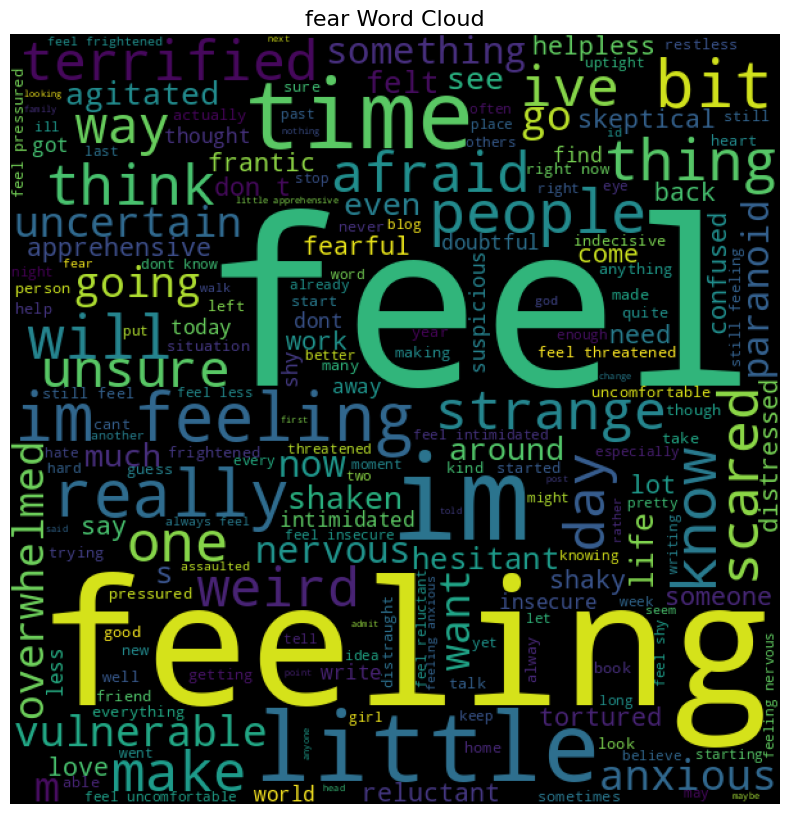

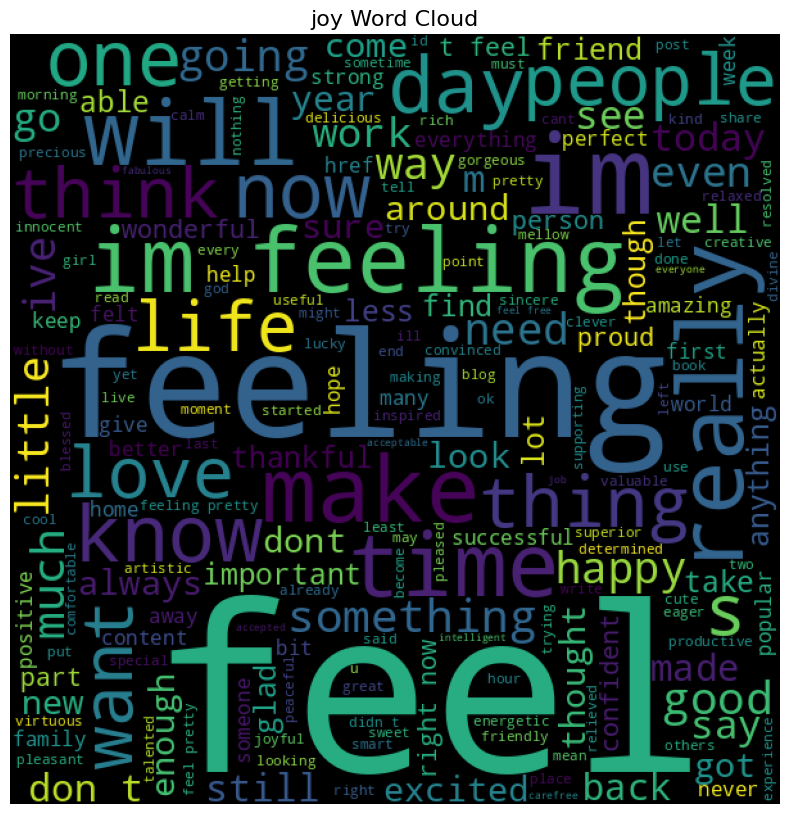

In [18]:
emotions_list = train_data['Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

Data Preprocessing

Encode emotions

In [19]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [20]:
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20
...,...,...,...
19995,i just keep feeling like someone is being unki...,0,163
19996,im feeling a little cranky negative after this...,0,66
19997,i feel that i am useful to my people and that ...,2,85
19998,im feeling more comfortable with derby i feel ...,2,88


Applying Machine Learning

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
df = train_data.copy()

In [23]:
df

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20
...,...,...,...
19995,i just keep feeling like someone is being unki...,0,163
19996,im feeling a little cranky negative after this...,0,66
19997,i feel that i am useful to my people and that ...,2,85
19998,im feeling more comfortable with derby i feel ...,2,88


Data Cleaning And Preprocessing

In [24]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

df['cleaned_comment'] = df['Comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'],df['Emotion'],test_size=0.2,random_state=42)

In [26]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

MULTI CLASS CLASSIFIACTION WITH MACHINE LEARNING ALGORITHMS

In [27]:
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
}

In [28]:
for name, model in models.items():
    print('-------------------------------------------------------')
    print("Classsification Report Of",name)
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\nAccuracy using TF-IDF: {accuracy_tfidf*100}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))

-------------------------------------------------------
Classsification Report Of Multinomial Naive Bayes

Accuracy using TF-IDF: 68.22500000000001
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.35      0.51       537
           1       0.88      0.27      0.42       441
           2       0.62      0.97      0.75      1334
           3       0.96      0.07      0.14       330
           4       0.72      0.91      0.80      1203
           5       1.00      0.01      0.03       155

    accuracy                           0.68      4000
   macro avg       0.85      0.43      0.44      4000
weighted avg       0.76      0.68      0.62      4000

-------------------------------------------------------
Classsification Report Of Logistic Regression

Accuracy using TF-IDF: 84.75
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       537
           1       0.8

Best Model: XGBoost with an accuracy of 85.5%.




---






Worst Model: AdaBoost with an accuracy of 36.03%.

In [29]:
best_model = XGBClassifier()
best_model.fit(X_train_tfidf, y_train)
best_model_pred= best_model.predict(X_test_tfidf)

In [30]:
def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    predicted_label = best_model.predict(input_vectorized)
    predicted_emotion = lb.inverse_transform([predicted_label])
    return predicted_emotion

In [31]:
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    pred_emotion = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    print('-------------------------------------------------------')

i didnt feel humiliated
Prediction : ['sadness']
-------------------------------------------------------
i feel strong and good overall
Prediction : ['joy']
-------------------------------------------------------
im grabbing a minute to post i feel greedy wrong
Prediction : ['anger']
-------------------------------------------------------
He was speechles when he found out he was accepted to this new job
Prediction : ['joy']
-------------------------------------------------------
This is outrageous, how can you talk like that?
Prediction : ['anger']
-------------------------------------------------------
I feel like im all alone in this world
Prediction : ['sadness']
-------------------------------------------------------
He is really sweet and caring
Prediction : ['love']
-------------------------------------------------------
You made me very crazy
Prediction : ['joy']
-------------------------------------------------------
i am ever feeling nostalgic about the fireplace i will know 

In [32]:
import pickle
pickle.dump(best_model,open("best_model.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))

In [33]:
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)

    one_hot_word = [one_hot(input_text=text, n=vocab_size) for text in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad


In [34]:
x_train = text_cleaning(train_data, "Comment", vocab_size=11000, max_len=300)
y_train = to_categorical(train_data["Emotion"])

In [35]:
x_train

array([[    0,     0,     0, ...,  8151, 10385,  7439],
       [    0,     0,     0, ...,  9943,  4490,  7552],
       [    0,     0,     0, ..., 10385,   549,  4768],
       ...,
       [    0,     0,     0, ...,  8210, 10385,  9414],
       [    0,     0,     0, ...,  8174,   432,  3016],
       [    0,     0,     0, ...,  6678,  6678, 10721]], dtype=int32)

In [36]:
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4078 - loss: 1.4563
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8757 - loss: 0.3610
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9267 - loss: 0.2077
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9449 - loss: 0.1560
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9572 - loss: 0.1163
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9581 - loss: 0.1079
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9657 - loss: 0.0915
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9696 - loss: 0.0767
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9717 - loss: 0.0722
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9728 - loss: 0.0679


In [46]:
print("Accuracy: {:.2f}%".format(history.history['accuracy'][-1] * 100))

Accuracy: 97.19%


In [40]:
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

In [45]:
sentences = [
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i feel strong and good overall
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
joy : 0.9999973773956299


im grabbing a minute to post i feel greedy wrong
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
anger : 0.9999997615814209


He was speechles when he found out he was accepted to this new job
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
joy : 0.5649927854537964


This is outrageous, how can you talk like that?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
anger : 0.8607684969902039


I feel like im all alone in this world
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
sadness : 0.9741869568824768


He is really sweet and caring
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
love : 0.7852844595909119


You made me very crazy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
anger :

In [43]:
model.save('lstm_model.h5')


with open('labelencoder.pkl', 'wb') as f:
    pickle.dump(lb, f)

vocab_info = {'vocab_size': 11000, 'max_len': 300}
with open('vocab_info.pkl', 'wb') as f:
    pickle.dump(vocab_info, f)